# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
base_cred = pd.read_csv('demo01_v2.csv')
base_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [3]:
y = base_cred.mau
X = base_cred.drop('mau',axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

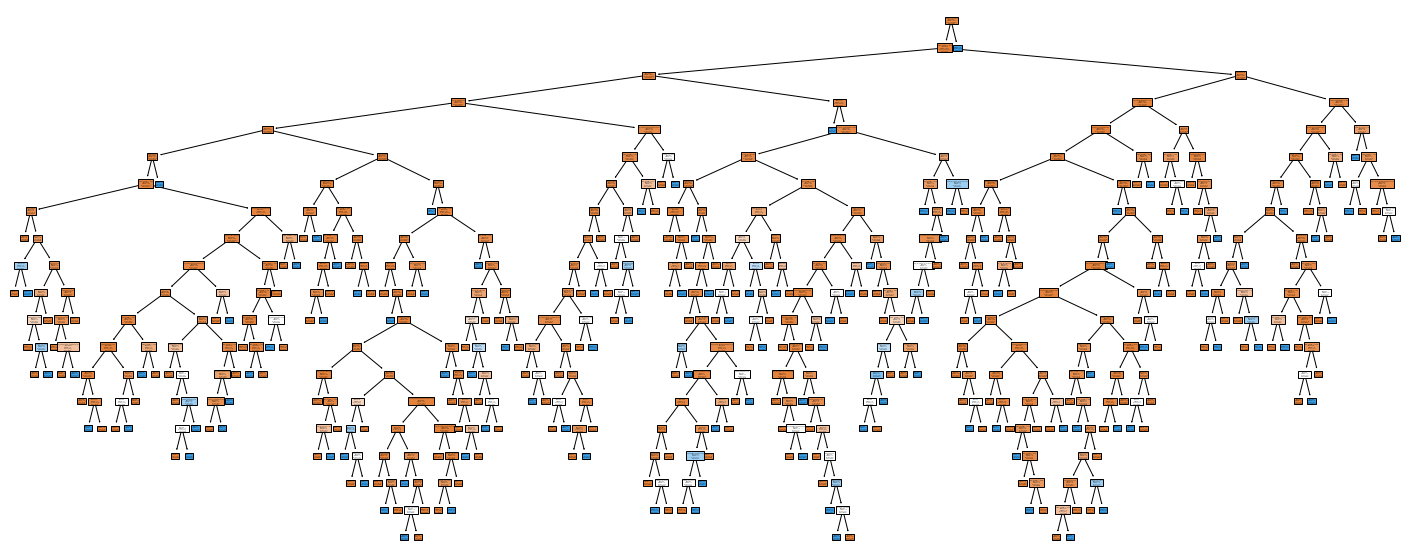

In [7]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

In [9]:
predict = clf.predict(X_train)

1.0

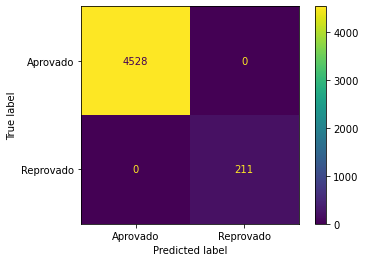

In [10]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_train, predict)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [25]:
clf = DecisionTreeClassifier(random_state=100)
clf_test = clf.fit(X_test,y_test)

1.0

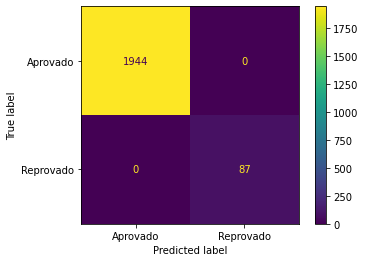

In [27]:
predict_test = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_test, predict_test)


**Observação:** Não sei se é possível haver acurárcia de 100%. Não sei se coloquei algum parâmetro errado.

### Nova Árvore random = 123, amostras mínimas de 5, profundida máxima 10

In [12]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf.fit(X_train,y_train)

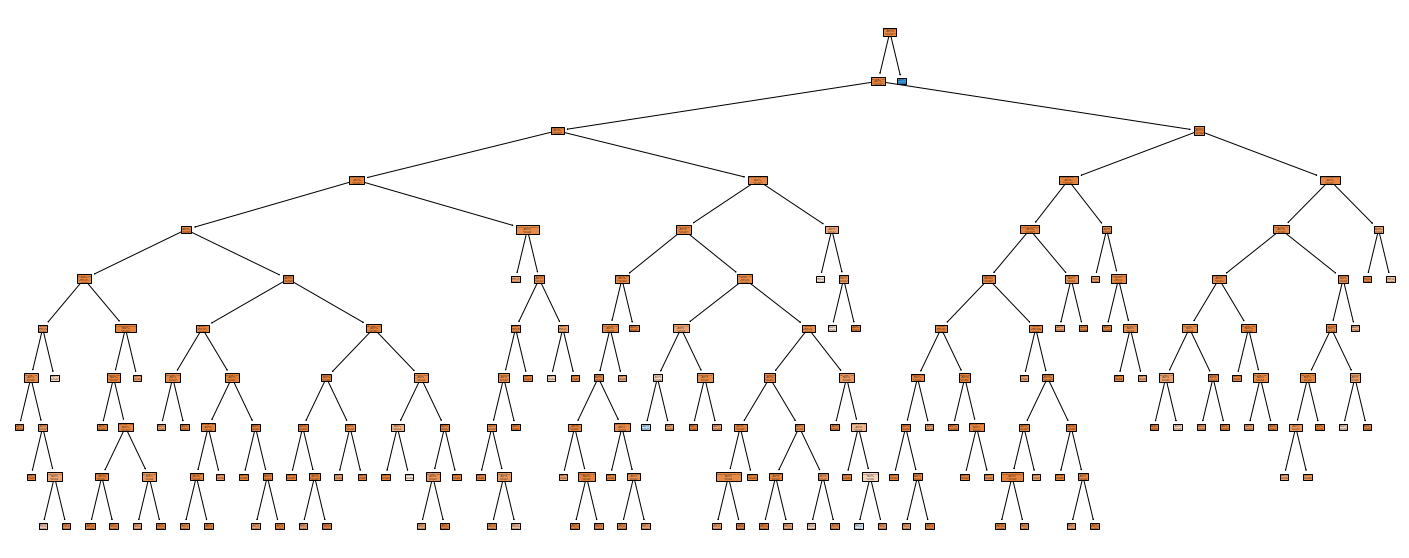

In [13]:
plt.figure(figsize=(25, 10))
plot_tree(clf2,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

0.9773510585918267

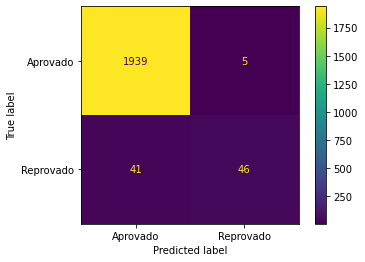

In [14]:
predict_2 = clf2.predict(X_test)
plot_confusion_matrix(clf2, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_test, predict_2)

### Nessa segunda árvore, após o pre pruning, a acuracidade cai para 97,73% e a proporção de amostras classifacadas como mau cai de 4,28% para 2,26%.

### Item 5)

Não entendi como fazer essa classifcação de 100% das amostras como mau = 0. Esse exercício não foi apresentado nas aulas da unidade.